In [39]:
import sys
sys.path.append('./src')
import json
from tqdm.autonotebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plot Compositional Results

Text(0, 0.5, 'Accuracy')

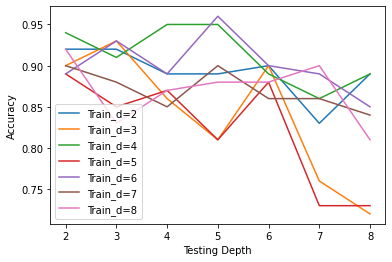

In [47]:
result = json.load(open('results/gpt3.json', 'r'))
result = {k:{int(i)+1:j for i,j in v[0].items()} for k,v in result.items()}
result = {f'Train_d={k}':v for k,v in result.items()}
pd.DataFrame(result).transpose().to_clipboard()
pd.DataFrame(result).plot()
plt.xlabel('Testing Depth')
plt.ylabel('Accuracy')

In [27]:
result = json.load(open('results/robertacomp_noun_adj_8_5000_5.json', 'r'))
result = {k:{int(k)+1:v for k,v in pd.DataFrame(v).mean().items()} for k,v in result.items()}

pd.DataFrame(result).to_clipboard()

In [23]:
{int(k)+1:v for k,v in pd.DataFrame(result['1']).mean().items()}

{1: 1.0,
 2: 0.9998400000000001,
 3: 0.98316,
 4: 0.9032,
 5: 0.7883199999999999,
 6: 0.6724399999999999,
 7: 0.603,
 8: 0.57288}

## Plot Num_training

Text(0, 0.5, 'Test Accuracy')

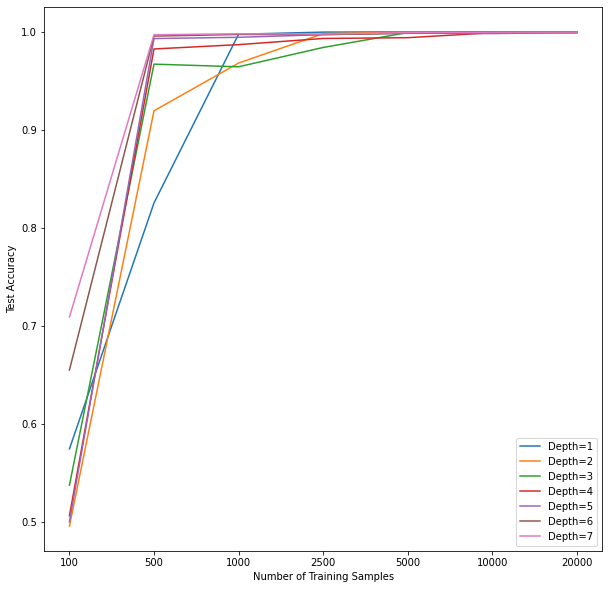

In [30]:
plt.figure(figsize=(10, 10))
for d in range(1, 8):
    result = json.load(open(f'results/robertanum_{d}.json', 'r'))
    plt.plot(list(result.keys()), list(result.values()), label=f'Depth={d}')
plt.legend()
plt.xlabel('Number of Training Samples')
plt.ylabel('Test Accuracy')

In [37]:
data = [0.7009803921568627, 0.7009803921568627, 0.7156862745098039, 0.6813725490196079, 0.6617647058823529]
print(f'{np.mean(data):.2f}±{np.std(data):.2f} ')

0.69±0.02 
